In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

In [197]:
df = pd.read_csv('./data/JA_Dataset_240229.csv')

In [198]:
df

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,WNDDIR,Week WNDDIR,WNDSPD,Week WNDSPD,RHUM,Week RHUM,Rain,Week Rain,Status,Week Status
0,2017/12/31 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2131.999998,7277.999998,0,0,6.4,34.6,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.5,1,3
1,2018/1/1 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.8,34.6,...,161.085106,1147.126773,0.627660,6.92141,74.872340,384.434840,0.0,0.5,0,3
2,2018/1/2 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,5.4,34.6,...,254.437500,1147.126773,1.552083,6.92141,63.583333,384.434840,0.0,0.5,0,3
3,2018/1/3 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.3,34.6,...,197.770833,1147.126773,2.422917,6.92141,40.604167,384.434840,0.0,0.5,0,3
4,2018/1/4 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2656.000000,7277.999998,0,0,2.9,34.6,...,159.333333,1147.126773,0.727083,6.92141,56.270833,384.434840,0.0,0.5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2023/11/21 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1055.000000,6745.000000,0,0,11.8,96.3,...,195.562500,1464.000000,0.791667,12.82500,77.875000,480.979167,0.0,1.0,1,5
2152,2023/11/22 0:00,2023/11/19 0:00,2023/11/25 0:00,17,0.000000,6745.000000,0,0,14.5,96.3,...,200.458333,1464.000000,1.185417,12.82500,81.604167,480.979167,0.0,1.0,0,5
2153,2023/11/23 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1967.000000,6745.000000,0,0,16.5,96.3,...,231.895833,1464.000000,1.900000,12.82500,78.166667,480.979167,1.0,1.0,1,5
2154,2023/11/24 0:00,2023/11/19 0:00,2023/11/25 0:00,17,1682.000000,6745.000000,0,0,17.8,96.3,...,237.250000,1464.000000,5.079167,12.82500,54.625000,480.979167,0.0,1.0,1,5


In [199]:
# 'date'列から年情報を抽出し、新しい列 'Year' を作成
df['Year'] = pd.to_datetime(df['date']).dt.year

# 'Year' と 'Week Number' の組み合わせに基づいて重複を削除
df_deduplicated = df.drop_duplicates(subset=['Year', 'Week Number'], keep='first')

df = df_deduplicated

In [200]:
# testデータのための確認
df

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,Week WNDDIR,WNDSPD,Week WNDSPD,RHUM,Week RHUM,Rain,Week Rain,Status,Week Status,Year
0,2017/12/31 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2131.999998,7277.999998,0,0,6.4,34.6,...,NaN,NaN,NaN,NaN,NaN,0.5,0.5,1,3,2017
1,2018/1/1 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,7277.999998,0,0,6.8,34.6,...,1147.126773,0.627660,6.921410,74.872340,384.434840,0.0,0.5,0,3,2018
7,2018/1/7 0:00,2018/1/7 0:00,2018/1/13 0:00,24,0.000000,6983.000000,0,0,4.8,38.8,...,1522.979167,0.560417,20.870833,71.416667,420.208333,0.0,58.5,0,5,2018
14,2018/1/14 0:00,2018/1/14 0:00,2018/1/20 0:00,25,1349.000000,7486.000000,0,0,2.5,57.0,...,1212.687500,0.697917,9.475000,57.333333,504.666667,0.0,16.5,1,5,2018
21,2018/1/21 0:00,2018/1/21 0:00,2018/1/27 0:00,26,1598.000000,7753.000000,0,0,6.1,22.1,...,1375.541667,0.550000,18.306250,80.937500,427.979167,0.0,4.5,1,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2023/10/22 0:00,2023/10/22 0:00,2023/10/28 0:00,13,1211.000000,7376.000000,110,110,15.0,113.3,...,1270.583333,0.652083,4.612500,68.854167,513.708333,0.0,0.0,1,6,2023
2128,2023/10/29 0:00,2023/10/29 0:00,2023/11/4 0:00,14,1150.000000,4387.000000,0,682,15.7,114.7,...,1291.500000,0.702083,5.308333,80.750000,549.645833,9.0,9.0,1,4,2023
2135,2023/11/5 0:00,2023/11/5 0:00,2023/11/11 0:00,15,1633.000000,12048.000000,0,242,18.8,124.7,...,1095.687500,0.810417,8.139583,83.875000,560.125000,0.0,32.0,1,5,2023
2142,2023/11/12 0:00,2023/11/12 0:00,2023/11/18 0:00,16,2376.000000,7314.000000,0,0,13.8,83.7,...,1167.791667,1.058333,11.787500,71.083333,500.083333,0.0,49.0,1,5,2023


In [201]:
df['Week Temp_Teisyoku'] = df['Week Teisyoku'] * df['Week Temp']
df['Week Temp_GLBRAD'] = df['Week GLBRAD'] * df['Week Temp']
df['Week GLBRAD_Teisyoku'] = df['Week Teisyoku'] * df['Week GLBRAD']
df['Week Temp_Teisyoku_GLBRAD'] = df['Week Teisyoku'] * df['Week Temp']* df['Week GLBRAD']

/tmp/ipykernel_475/569892654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week Temp_Teisyoku'] = df['Week Teisyoku'] * df['Week Temp']
/tmp/ipykernel_475/569892654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week Temp_GLBRAD'] = df['Week GLBRAD'] * df['Week Temp']
/tmp/ipykernel_475/569892654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [202]:
# target列を追加
df['Target'] = df['Week Shipment'].shift(-14)

# Week Shipment列を先週の結果とする
df['Week Shipment'] = df['Week Shipment'].shift(7)

/tmp/ipykernel_475/548400467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Week Shipment'].shift(-14)
/tmp/ipykernel_475/548400467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week Shipment'] = df['Week Shipment'].shift(7)


In [203]:
df[:]

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,Rain,Week Rain,Status,Week Status,Year,Week Temp_Teisyoku,Week Temp_GLBRAD,Week GLBRAD_Teisyoku,Week Temp_Teisyoku_GLBRAD,Target
0,2017/12/31 0:00,2017/12/31 0:00,2018/1/6 0:00,23,2131.999998,NaN,0,0,6.4,34.6,...,0.5,0.5,1,3,2017,0.0,NaN,NaN,NaN,14395.0
1,2018/1/1 0:00,2017/12/31 0:00,2018/1/6 0:00,23,0.000000,NaN,0,0,6.8,34.6,...,0.0,0.5,0,3,2018,0.0,26885.227572,0.000000,0.000000e+00,12968.0
7,2018/1/7 0:00,2018/1/7 0:00,2018/1/13 0:00,24,0.000000,NaN,0,0,4.8,38.8,...,0.0,58.5,0,5,2018,0.0,36325.691668,0.000000,0.000000e+00,12992.0
14,2018/1/14 0:00,2018/1/14 0:00,2018/1/20 0:00,25,1349.000000,NaN,0,0,2.5,57.0,...,0.0,16.5,1,5,2018,0.0,49341.812498,0.000000,0.000000e+00,11049.0
21,2018/1/21 0:00,2018/1/21 0:00,2018/1/27 0:00,26,1598.000000,NaN,0,0,6.1,22.1,...,0.0,4.5,1,5,2018,0.0,21270.789584,0.000000,0.000000e+00,12765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2023/10/22 0:00,2023/10/22 0:00,2023/10/28 0:00,13,1211.000000,0.000000,110,110,15.0,113.3,...,0.0,0.0,1,6,2023,12463.0,138950.647879,134903.541630,1.528457e+07,NaN
2128,2023/10/29 0:00,2023/10/29 0:00,2023/11/4 0:00,14,1150.000000,16.000000,0,682,15.7,114.7,...,9.0,9.0,1,4,2023,78225.4,126272.752045,750810.958106,8.611802e+07,NaN
2135,2023/11/5 0:00,2023/11/5 0:00,2023/11/11 0:00,15,1633.000000,203.000000,0,242,18.8,124.7,...,0.0,32.0,1,5,2023,30177.4,105101.316663,203965.666659,2.543452e+07,NaN
2142,2023/11/12 0:00,2023/11/12 0:00,2023/11/18 0:00,16,2376.000000,767.000002,0,0,13.8,83.7,...,0.0,49.0,1,5,2023,0.0,64101.993753,0.000000,0.000000e+00,NaN


In [204]:
df = df.dropna()

In [205]:
window_size = 4

# window_sizeの数だけ全ての特徴量を切り出して縦に繋げる
data = np.vstack([df[df.columns].values[i:i+window_size] for i in range(len(df) - window_size)])

# dataをDataFrameに変換
data = pd.DataFrame(data, columns=df.columns)

# id列の追加
# 1,1,1...30個,2,2,2...30個,3,3,3...30個...というように連番を振る
data['id'] = np.repeat(range(len(df) - window_size), window_size)

# time列の作成
# 1,2,3...30,1,2,3...30,1,2,3...30...というように1から30までの連番を振る
data['time'] = np.tile(range(1, window_size + 1), len(df) - window_size)

data

,date,Week Start,Week End,Week Number,Shipment,Week Shipment,Teisyoku,Week Teisyoku,Temp,Week Temp,...,Status,Week Status,Year,Week Temp_Teisyoku,Week Temp_GLBRAD,Week GLBRAD_Teisyoku,Week Temp_Teisyoku_GLBRAD,Target,id,time
0,2018/2/11 0:00,2018/2/11 0:00,2018/2/17 0:00,29,0.0,7277.999998,0,0,9.3,53.1,...,0,5,2018,0.0,75323.456232,0.0,0.0,12251.0,0,1
1,2018/2/18 0:00,2018/2/18 0:00,2018/2/24 0:00,30,2183.0,7277.999998,0,0,3.6,41.3,...,1,5,2018,0.0,54759.497903,0.0,0.0,13566.0,0,2
2,2018/2/25 0:00,2018/2/25 0:00,2018/3/3 0:00,31,1936.0,6983.0,0,0,7.6,67.6,...,1,5,2018,0.0,100231.083311,0.0,0.0,12303.0,0,3
3,2018/3/4 0:00,2018/3/4 0:00,2018/3/10 0:00,32,2139.0,7486.0,0,0,15.1,81.7,...,1,5,2018,0.0,57773.814581,0.0,0.0,13198.0,0,4
4,2018/2/18 0:00,2018/2/18 0:00,2018/2/24 0:00,30,2183.0,7277.999998,0,0,3.6,41.3,...,1,5,2018,0.0,54759.497903,0.0,0.0,13566.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,2023/7/30 0:00,2023/7/30 0:00,2023/8/5 0:00,1,0.0,14338.0,0,10274,29.3,205.7,...,0,0,2023,2113361.8,396101.0625,19783871.25,4069542316.125,12048.0,281,4
1128,2023/7/16 0:00,2023/7/16 0:00,2023/7/22 0:00,51,0.0,17503.0,0,3652,28.8,199.9,...,0,4,2023,730034.8,413105.84375,7547086.25,1508662541.375,7376.0,282,1
1129,2023/7/23 0:00,2023/7/23 0:00,2023/7/29 0:00,52,0.0,14071.0,0,3036,27.4,199.1,...,0,0,2023,604467.6,441421.2916,6731064.998988,1340155041.298511,4387.0,282,2
1130,2023/7/30 0:00,2023/7/30 0:00,2023/8/5 0:00,1,0.0,14338.0,0,10274,29.3,205.7,...,0,0,2023,2113361.8,396101.0625,19783871.25,4069542316.125,12048.0,282,3


In [206]:
data.shape

(1132, 38)

In [207]:
data.to_csv('output1.csv', index=False)


In [208]:
# 指定された列を削除するための列名リスト
columns_to_drop = [
    "AIRTMP", "GLBRAD_30MIN", "WNDDIR", "WNDSPD", "RHUM",
    "Teisyoku", "Temp", "High Temp", "Low Temp",
    "AIRTMP", "GLBRAD", "GLBRAD_30MIN", 
    "WNDDIR", "WNDSPD", "Status","Week Shipment"
]

# 指定された列を削除
data_ = data.drop(columns_to_drop, axis=1)

In [209]:
# tsfreshに不要な列の削除
data_ = data_.drop(['date', 'Week Start', 'Week End', 'Target'], axis=1)
data_ = data_.dropna()

In [210]:
data_

,Week Number,Shipment,Week Teisyoku,Week Temp,Week High Temp,Week Low Temp,Week AIRTMP,Week GLBRAD,Week GLBRAD_30MIN,Week WNDDIR,...,Rain,Week Rain,Week Status,Year,Week Temp_Teisyoku,Week Temp_GLBRAD,Week GLBRAD_Teisyoku,Week Temp_Teisyoku_GLBRAD,id,time
0,29,0.0,0,53.1,88.6,16.5,50.375,1418.520833,2.552708,1646.4375,...,0.0,0.0,5,2018,0.0,75323.456232,0.0,0.0,0,1
1,30,2183.0,0,41.3,85.0,4.1,41.0125,1325.895833,2.386042,999.291667,...,0.0,0.5,5,2018,0.0,54759.497903,0.0,0.0,0,2
2,31,1936.0,0,67.6,107.9,27.6,65.208333,1482.708333,2.667917,1139.520833,...,0.0,31.5,5,2018,0.0,100231.083311,0.0,0.0,0,3
3,32,2139.0,0,81.7,112.4,57.9,78.966667,707.145833,1.271667,1146.729167,...,0.0,142.0,5,2018,0.0,57773.814581,0.0,0.0,0,4
4,30,2183.0,0,41.3,85.0,4.1,41.0125,1325.895833,2.386042,999.291667,...,0.0,0.5,5,2018,0.0,54759.497903,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1,0.0,10274,205.7,242.1,178.3,204.833333,1925.625,3.466667,1617.4375,...,0.0,2.0,0,2023,2113361.8,396101.0625,19783871.25,4069542316.125,281,4
1128,51,0.0,3652,199.9,237.0,172.5,196.641667,2066.5625,3.760833,1337.604167,...,0.0,0.0,4,2023,730034.8,413105.84375,7547086.25,1508662541.375,282,1
1129,52,0.0,3036,199.1,239.7,165.9,196.277083,2217.083333,3.987083,1487.1875,...,0.0,0.0,0,2023,604467.6,441421.2916,6731064.998988,1340155041.298511,282,2
1130,1,0.0,10274,205.7,242.1,178.3,204.833333,1925.625,3.466667,1617.4375,...,0.0,2.0,0,2023,2113361.8,396101.0625,19783871.25,4069542316.125,282,3


In [211]:
# DataFrame全体にNaNが含まれているか調べる
nan_exists = data_.isna().any().any()

# 結果を表示
print(f"DataFrameにNaNが含まれていますか？ {'はい' if nan_exists else 'いいえ'}")

DataFrameにNaNが含まれていますか？ いいえ


In [212]:
data_.dtypes

Week Number                  object
Shipment                     object
Week Teisyoku                object
Week Temp                    object
Week High Temp               object
Week Low Temp                object
Week AIRTMP                  object
Week GLBRAD                  object
Week GLBRAD_30MIN            object
Week WNDDIR                  object
Week WNDSPD                  object
Week RHUM                    object
Rain                         object
Week Rain                    object
Week Status                  object
Year                         object
Week Temp_Teisyoku           object
Week Temp_GLBRAD             object
Week GLBRAD_Teisyoku         object
Week Temp_Teisyoku_GLBRAD    object
id                            int64
time                          int64
dtype: object

In [213]:
# object型の列をfloat型に変換
data_ = data_.astype(float)

# timeとidはint型に変換
data_['time'] = data_['time'].astype(int)
data_['id'] = data_['id'].astype(int)

In [214]:
data_.dtypes

Week Number                  float64
Shipment                     float64
Week Teisyoku                float64
Week Temp                    float64
Week High Temp               float64
Week Low Temp                float64
Week AIRTMP                  float64
Week GLBRAD                  float64
Week GLBRAD_30MIN            float64
Week WNDDIR                  float64
Week WNDSPD                  float64
Week RHUM                    float64
Rain                         float64
Week Rain                    float64
Week Status                  float64
Year                         float64
Week Temp_Teisyoku           float64
Week Temp_GLBRAD             float64
Week GLBRAD_Teisyoku         float64
Week Temp_Teisyoku_GLBRAD    float64
id                             int64
time                           int64
dtype: object

In [215]:
from tsfresh import extract_features

features = extract_features(data_, column_id='id', column_sort='time', n_jobs=16)

Feature Extraction:   0%|          | 0/80 [00:09<?, ?it/s]


In [ ]:
from tsfresh.utilities.dataframe_functions import impute

# 特徴量拡張後のDataFrameにimputeを適用
features = impute(features)


/usr/local/lib/python3.8/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Week High Temp__sample_entropy' 'Week High Temp__autocorrelation__lag_4'
 'Week High Temp__autocorrelation__lag_5' ...
 'Week Temp__permutation_entropy__dimension_7__tau_1'
 'Week Temp__query_similarity_count__query_None__threshold_0.0'
 'Week Temp__mean_n_absolute_max__number_of_maxima_7'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [ ]:
features

,Week High Temp__variance_larger_than_standard_deviation,Week High Temp__has_duplicate_max,Week High Temp__has_duplicate_min,Week High Temp__has_duplicate,Week High Temp__sum_values,Week High Temp__abs_energy,Week High Temp__mean_abs_change,Week High Temp__mean_change,Week High Temp__mean_second_derivative_central,Week High Temp__median,...,Week Temp__fourier_entropy__bins_5,Week Temp__fourier_entropy__bins_10,Week Temp__fourier_entropy__bins_100,Week Temp__permutation_entropy__dimension_3__tau_1,Week Temp__permutation_entropy__dimension_4__tau_1,Week Temp__permutation_entropy__dimension_5__tau_1,Week Temp__permutation_entropy__dimension_6__tau_1,Week Temp__permutation_entropy__dimension_7__tau_1,Week Temp__query_similarity_count__query_None__threshold_0.0,Week Temp__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,0.0,393.9,39351.13,10.333333,7.933333,2.025,98.25,...,0.636514,0.636514,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,424.9,45805.33,11.533333,11.533333,-3.925,110.15,...,0.636514,1.098612,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,450.3,50768.49,6.966667,0.833333,-3.425,111.40,...,0.636514,0.636514,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,486.8,59977.44,16.800000,10.666667,6.700,116.00,...,1.098612,1.098612,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,527.6,70813.92,17.333333,11.200000,4.500,132.00,...,0.636514,0.636514,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1.0,0.0,0.0,0.0,832.2,173617.88,9.800000,9.800000,-2.550,210.60,...,0.636514,0.636514,1.098612,-0.000000,-0.0,0.0,0.0,0.0,0.0,0.0
279,1.0,0.0,0.0,0.0,878.4,193382.24,9.866667,9.866667,2.600,217.00,...,0.636514,1.098612,1.098612,-0.000000,-0.0,0.0,0.0,0.0,0.0,0.0
280,1.0,0.0,0.0,0.0,910.7,207823.57,8.633333,8.633333,-0.925,228.60,...,0.636514,0.636514,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0
281,1.0,0.0,0.0,0.0,939.0,220725.54,7.300000,7.300000,-3.600,238.35,...,1.098612,1.098612,1.098612,0.693147,-0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from sklearn.preprocessing import MinMaxScaler
impute(features)
scaler = MinMaxScaler()

# ターゲットベクトルの設定
y = df['Target'].astype(float)
y = scaler.fit_transform(y.values.reshape(-1, 1)[:len(features)]).ravel()
# featuresの各列を正規化
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
# ターゲットベクトル y とともに select_features を使用
filtered_features = select_features(normalized_features, y, fdr_level=0.00001)
# Target列を結合
filtered_features['Target'] = y

In [ ]:
filtered_features

,Week Temp_GLBRAD__median,Week AIRTMP__benford_correlation,Week Temp_GLBRAD__quantile__q_0.3,Week Temp_GLBRAD__quantile__q_0.6,Week Temp_GLBRAD__quantile__q_0.4,Week Temp_GLBRAD__quantile__q_0.2,Week Temp_GLBRAD__quantile__q_0.1,"Week Temp_GLBRAD__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Week Temp_GLBRAD__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)",Week Temp_GLBRAD__quantile__q_0.7,...,Week GLBRAD_30MIN__variance,Week GLBRAD_30MIN__standard_deviation,Shipment__first_location_of_minimum,"Week GLBRAD__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",Week Number__quantile__q_0.1,"Week GLBRAD_30MIN__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.0",Week GLBRAD_30MIN__absolute_sum_of_changes,Week GLBRAD_30MIN__mean_abs_change,"Week Rain__linear_trend__attr_""intercept""",Target
0,0.096752,0.143294,0.081429,0.107691,0.087195,0.083686,0.091323,0.106676,0.118424,0.115446,...,0.221067,0.451932,0.000000,0.197677,0.571429,0.327748,0.327748,0.327748,0.101105,0.699937
1,0.130027,0.092570,0.081429,0.159976,0.100639,0.083686,0.091323,0.099210,0.107166,0.178272,...,0.251868,0.484667,0.333333,0.550201,0.591837,0.587250,0.587250,0.587250,0.222106,0.775067
2,0.162636,0.126649,0.142722,0.172785,0.153340,0.129077,0.119313,0.154759,0.162154,0.178272,...,0.261408,0.494398,0.000000,0.613383,0.612245,0.695627,0.695627,0.695627,0.320070,0.702908
3,0.194364,0.433974,0.142722,0.222638,0.166159,0.129077,0.119313,0.120744,0.150380,0.248369,...,0.430150,0.643874,0.333333,0.449377,0.632653,0.690519,0.690519,0.690519,0.403141,0.754042
4,0.334188,0.753057,0.252979,0.376533,0.290338,0.228852,0.207220,0.215078,0.254875,0.392270,...,0.177318,0.401246,0.000000,0.358028,0.653061,0.477115,0.477115,0.477115,0.198255,0.705251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.696967,0.946260,0.676998,0.703642,0.686764,0.667994,0.660173,0.550531,0.635154,0.693314,...,0.028681,0.142724,1.000000,0.043681,0.938776,0.147773,0.147773,0.147773,0.233973,0.043821
279,0.754799,0.946260,0.753131,0.753847,0.751956,0.762942,0.774866,0.661258,0.699561,0.756333,...,0.113829,0.314920,1.000000,0.109507,0.959184,0.312750,0.312750,0.312750,0.324607,0.077130
280,0.900421,0.946260,0.803491,0.955169,0.839066,0.822527,0.844059,0.729571,0.808754,0.972291,...,0.153792,0.371395,0.666667,0.107135,0.979592,0.272783,0.272783,0.272783,0.311693,0.096726
281,1.000000,1.000000,0.988129,0.994285,1.000000,0.950596,0.910412,0.770540,0.912988,0.972291,...,0.139846,0.352619,0.333333,0.133077,0.293878,0.299346,0.299346,0.299346,0.158464,0.156202


In [ ]:
filtered_features.columns

Index(['Week Temp_GLBRAD__median', 'Week AIRTMP__benford_correlation',
       'Week Temp_GLBRAD__quantile__q_0.3',
       'Week Temp_GLBRAD__quantile__q_0.6',
       'Week Temp_GLBRAD__quantile__q_0.4',
       'Week Temp_GLBRAD__quantile__q_0.2',
       'Week Temp_GLBRAD__quantile__q_0.1',
       'Week Temp_GLBRAD__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Week Temp_GLBRAD__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)',
       'Week Temp_GLBRAD__quantile__q_0.7',
       ...
       'Week GLBRAD_30MIN__variance', 'Week GLBRAD_30MIN__standard_deviation',
       'Shipment__first_location_of_minimum',
       'Week GLBRAD__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.0',
       'Week Number__quantile__q_0.1',
       'Week GLBRAD_30MIN__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
       'Week GLBRAD_30MIN__absolute_sum_of_changes',
       'Week GLBRAD_30MIN__mean_abs_change',
       'Week Rain__linear_trend__attr_"intercept"', 'Targe

In [ ]:
# featuresの各列とansの相関を計算
correlations = filtered_features.corrwith(filtered_features['Target'])

# 相関係数を降順に並べ替え
sorted_correlations = correlations.sort_values(ascending=False)
# 上位%に相当する要素の数を計算
top_10_percent_index = int(len(sorted_correlations) * 0.01)
# 相関が高い上位10%の相関値を選択
top_10_percent_correlations = sorted_correlations.head(top_10_percent_index)

# 上位10%の相関値を表示
print("Top 10% Correlation Values:")
print(top_10_percent_correlations)
print(len(top_10_percent_correlations))

Top 10% Correlation Values:
Target                                               1.000000
Week GLBRAD_30MIN__benford_correlation               0.542140
Week Low Temp__fft_aggregated__aggtype_"centroid"    0.497463
Shipment__benford_correlation                        0.483605
dtype: float64
4


In [ ]:
# top_10_percent_correlationsをDataFrameとして保存
top_10_percent_correlations_df = pd.DataFrame(top_10_percent_correlations, columns=['Correlation'])
top_10_percent_correlations_df.to_csv('/code/top_1_percent_correlations_window1.csv')

In [ ]:
top_10_percent_features_names = top_10_percent_correlations.index.tolist()
filtered_features = filtered_features[top_10_percent_features_names]

In [ ]:
filtered_features

,Target,Week GLBRAD_30MIN__benford_correlation,"Week Low Temp__fft_aggregated__aggtype_""centroid""",Shipment__benford_correlation
0,0.699937,0.583562,0.306827,0.803432
1,0.775067,0.583562,0.199028,0.941488
2,0.702908,0.911871,0.256988,0.941488
3,0.754042,1.000000,0.109783,0.723513
4,0.705251,0.715463,0.222996,0.723513
...,...,...,...,...
278,0.043821,0.296183,0.103173,0.723400
279,0.077130,0.251167,0.033038,0.769480
280,0.096726,0.129223,0.041269,0.669596
281,0.156202,0.129223,0.015732,0.160964


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

# Xとyにデータを格納
X = filtered_features.drop('Target', axis=1).values
y = filtered_features['Target'].values

In [ ]:
X, y

(array([[5.83562313e-01, 3.06826977e-01, 8.03432066e-01],
        [5.83562313e-01, 1.99027915e-01, 9.41488029e-01],
        [9.11870855e-01, 2.56987824e-01, 9.41488029e-01],
        [1.00000000e+00, 1.09783424e-01, 7.23512693e-01],
        [7.15463383e-01, 2.22996367e-01, 7.23512693e-01],
        [5.98968162e-01, 1.35914998e-01, 5.20642882e-01],
        [1.29222853e-01, 1.81776493e-01, 5.20642882e-01],
        [1.29222853e-01, 9.10444942e-02, 5.20642882e-01],
        [2.41098545e-02, 1.21830665e-01, 5.20642882e-01],
        [1.29222853e-01, 4.38427348e-02, 5.20642882e-01],
        [1.29222853e-01, 1.24367977e-01, 5.20642882e-01],
        [1.29222853e-01, 1.17769487e-01, 5.20642882e-01],
        [2.51167316e-01, 1.56990837e-01, 5.20642882e-01],
        [1.29222853e-01, 6.07941733e-02, 5.20642882e-01],
        [2.51167316e-01, 9.37935076e-02, 5.20642882e-01],
        [2.96183470e-01, 2.12008250e-02, 5.20642882e-01],
        [2.96183470e-01, 9.85204719e-02, 5.20642882e-01],
        [2.961

In [ ]:
# Xを3次元にリシェイプ
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1))

# データの分割 (リシェイプされたXを使用)
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=40, shuffle=False)
"""
X_train = X_reshaped[:1673]
X_test = X_reshaped[1673:]
y_train = y[:1673]
y_test = y[1673:]
"""

'\nX_train = X_reshaped[:1673]\nX_test = X_reshaped[1673:]\ny_train = y[:1673]\ny_test = y[1673:]\n'

In [ ]:
# 全データポイントの数を取得
total_points = len(X_reshaped)

# 訓練データとテストデータに分割するためのインデックスを計算
split_index = int(total_points * 0.8)

# 訓練データとテストデータに分割
X_train = X_reshaped[:split_index]
X_test = X_reshaped[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 3, 1), (57, 3, 1), (226,), (57,))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def train_and_evaluate_model(gru_units, dense_units):
    model = Sequential()
    model.add(GRU(units=gru_units, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
    # モデルの訓練
    history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
    
    # 検証データでの損失を評価
    val_loss = model.evaluate(X_test, y_test, verbose=0)

    print(f"GRU Units: {gru_units}, Dense Units: {dense_units}, Validation Loss: {val_loss}")

    return gru_units, dense_units, val_loss

In [ ]:
# 結果を格納するための空のリストを作成
results = []

# 異なるハイパーパラメータの組み合わせでモデルを訓練し評価
for gru_units in [512]:
    for dense_units in [512]:
        result = train_and_evaluate_model(gru_units, dense_units)
        results.append(result)

print(results)

# 結果をDataFrameに変換
results_df = pd.DataFrame(results, columns=['GRU Units', 'Dense Units', 'Validation Loss'])

# 結果をCSVファイルに書き込む
results_df.to_csv('./gru_performance_5.csv', index=False)

GRU Units: 512, Dense Units: 256, Validation Loss: 0.24510209262371063
[(512, 256, 0.24510209262371063)]


In [ ]:
# X_test と y_test の検証
if np.isnan(X_test).any() or np.isnan(y_test).any():
    print("データに NaN 値が含まれています。")
if np.isinf(X_test).any() or np.isinf(y_test).any():
    print("データに無限大の値が含まれています。")


In [ ]:
# モデルの初期化
model = Sequential()

# GRU層の追加 (リシェイプ後のXを使用)
model.add(GRU(units=128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
# ReLU活性化関数を使用したDense層の追加
model.add(Dense(units=256, activation='relu'))  # 中間層
# 出力層の追加
model.add(Dense(units=1, activation='relu'))  

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error')

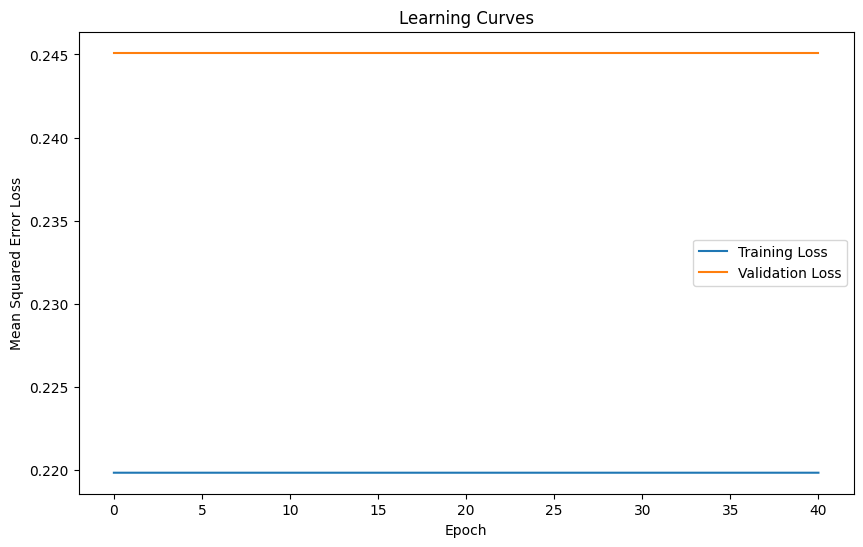

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


In [ ]:
y_pred = model.predict(X_test)

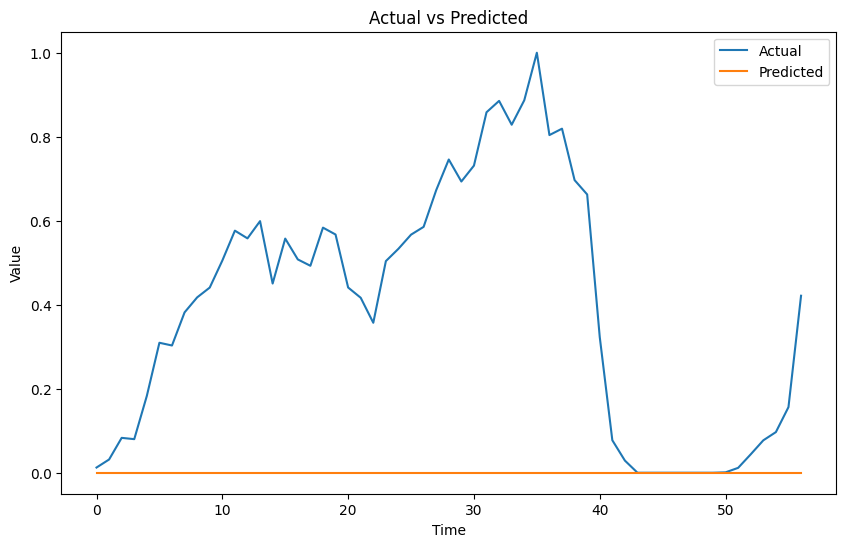

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# モデルの保存
model.save('/code/GRU_best_4.h5')

In [ ]:
# モデルの読み込み
from keras.models import load_model
current_model = load_model('/code/GRU_best_4.h5')

In [ ]:
# 予測結果の計算
y_pred = current_model.predict(X_test)

# testデータの予測結果をDataFrameに格納
result = df[['date', 'Week Start', 'Week End', 'Week Number', 'Target']][1673:-30]
result['Pred'] = y_pred * df['Target'].max()
result.to_csv('/code/20240308_GRU_best_4.csv', index=False)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [ ]:
# import tensorflow as tf

# print("Available devices:")
# devices = tf.config.list_physical_devices()
# for device in devices:
#     print(device)
# print("Available GPUs:")
# gpus = tf.config.list_physical_devices('GPU')
# for gpu in gpus:
#     print(gpu)